In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **I)**

In [5]:
M=[267.08,244.76,222.54,200.11,176.80,154.37,132.05,109.22,87.09,67.38,44.97] # [g]
f=[83,81,78,52,66,80,62,72,46,46,60] # [Hz]
lamb=[47.01,46.5,45.5,65,48.5,36.5,44.2,35.3,49,42.5,28.6] # [cm]

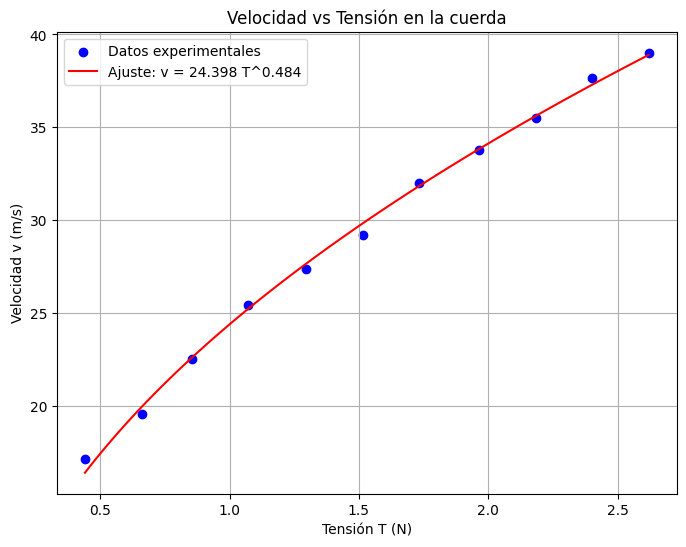

Modelo ajustado: v = 24.398 T^0.484
Errores: ΔA = 0.154, ΔB = 0.009
μ (densidad lineal) ≈ 0.00169 kg/m


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
M = np.array([267.08,244.76,222.54,200.11,176.80,154.37,132.05,109.22,87.09,67.38,44.97]) / 1000  # g -> kg
f = np.array([83,81,78,52,66,80,62,72,46,46,60])  # Hz
lamb = np.array([47.01,46.5,45.5,65,48.5,36.5,44.2,35.3,49,42.5,28.6]) / 100  # cm -> m

# Gravedad
g = 9.81  # m/s^2

# Tensión
T = M * g

# Velocidad de la onda
v = lamb * f

# Modelo potencial: v = A * T^B
def modelo_potencial(T, A, B):
    return A * T**B

# Ajuste del modelo
popt, pcov = curve_fit(modelo_potencial, T, v, p0=[1, 0.5])
A, B = popt
A_err, B_err = np.sqrt(np.diag(pcov))

# Graficar datos y ajuste
plt.figure(figsize=(8,6))
plt.scatter(T, v, label='Datos experimentales', color='blue')
T_fit = np.linspace(min(T), max(T), 100)
plt.plot(T_fit, modelo_potencial(T_fit, A, B), 'r-', label=f'Ajuste: v = {A:.3f} T^{B:.3f}')
plt.xlabel('Tensión T (N)')
plt.ylabel('Velocidad v (m/s)')
plt.title('Velocidad vs Tensión en la cuerda')
plt.legend()
plt.grid(True)
plt.show()

# Calcular densidad lineal promedio usando v = sqrt(T / mu)
# Promediando para obtener un valor único
mu = np.mean(T / v**2)
print(f"Modelo ajustado: v = {A:.3f} T^{B:.3f}")
print(f"Errores: ΔA = {A_err:.3f}, ΔB = {B_err:.3f}")
print(f"μ (densidad lineal) ≈ {mu:.5f} kg/m")


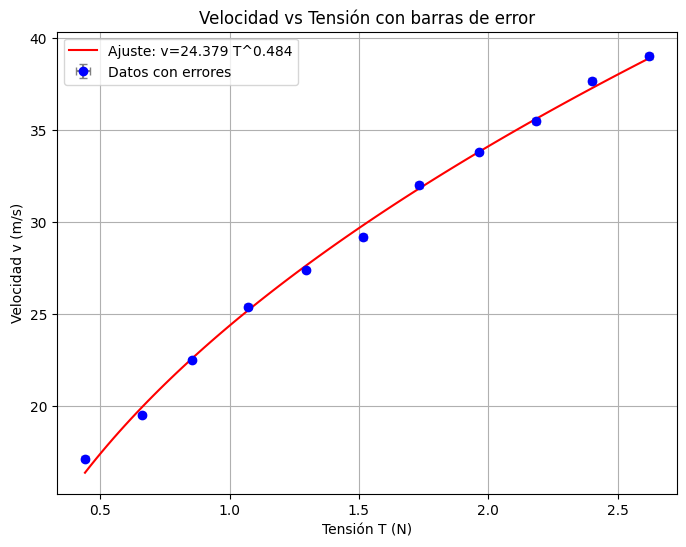

Modelo ajustado: v = (24.379 ± 0.046) T^0.484 ± 0.003
μ ≈ 0.00169 ± 0.00007 kg/m


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
M = np.array([267.08,244.76,222.54,200.11,176.80,154.37,132.05,109.22,87.09,67.38,44.97]) / 1000  # kg
f = np.array([83,81,78,52,66,80,62,72,46,46,60])  # Hz
lamb = np.array([47.01,46.5,45.5,65,48.5,36.5,44.2,35.3,49,42.5,28.6]) / 100  # m

# Errores
dM = 0.01 / 1000  # kg
df = 0.1          # Hz
dlamb = 0.2 / 100 # m

# Gravedad
g = 9.81

# Tensión y su error
T = M * g
dT = g * dM

# Velocidad y su error
v = lamb * f
dv = v * np.sqrt( (dlamb / lamb)**2 + (df / f)**2 )

# Modelo a ajustar
def modelo_potencial(T, A, B):
    return A * T**B

# Ajuste ponderado (opcional: inverso del error al cuadrado como peso)
popt, pcov = curve_fit(modelo_potencial, T, v, sigma=dv, absolute_sigma=True, p0=[1, 0.5])
A, B = popt
A_err, B_err = np.sqrt(np.diag(pcov))

# Calcular densidad lineal promedio y su error
mu = np.mean(T / v**2)
dmu = np.std(T / v**2)  # como estimación

# Gráfico con barras de error
plt.figure(figsize=(8,6))
plt.errorbar(T, v, xerr=dT, yerr=dv, fmt='o', color='blue', ecolor='gray', capsize=3, label='Datos con errores')
T_fit = np.linspace(min(T), max(T), 100)
plt.plot(T_fit, modelo_potencial(T_fit, A, B), 'r-', label=f'Ajuste: v={A:.3f} T^{B:.3f}')
plt.xlabel('Tensión T (N)')
plt.ylabel('Velocidad v (m/s)')
plt.title('Velocidad vs Tensión con barras de error')
plt.legend()
plt.grid(True)
plt.show()

# Resultados
print(f"Modelo ajustado: v = ({A:.3f} ± {A_err:.3f}) T^{B:.3f} ± {B_err:.3f}")
print(f"μ ≈ {mu:.5f} ± {dmu:.5f} kg/m")


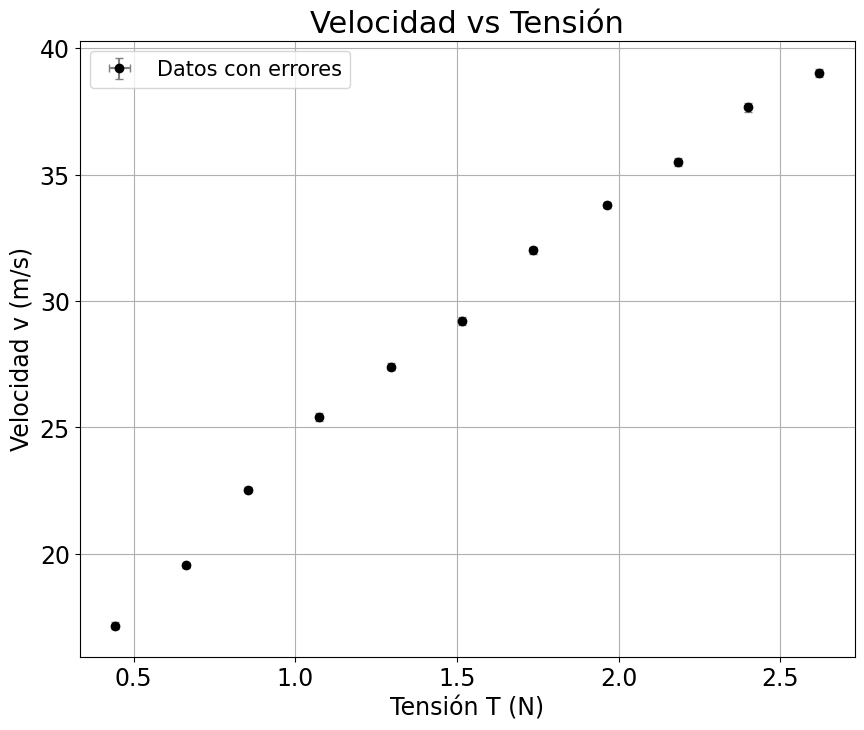

In [16]:
# Gráfico con barras de error
plt.figure(figsize=(10,8))
plt.errorbar(T, v, xerr=dT, yerr=dv, fmt='o', color='black', ecolor='gray', capsize=3, label='Datos con errores')
T_fit = np.linspace(min(T), max(T), 100)
plt.xlabel('Tensión T (N)',fontsize=17)
plt.ylabel('Velocidad v (m/s)',fontsize=17)
plt.title('Velocidad vs Tensión',fontsize=22)
plt.grid(True)
plt.legend(fontsize=15)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [11]:
print("Tensión [N] :",T)
print("V [m/s]:", v)

Tensión [N] : [2.6200548 2.4010956 2.1831174 1.9630791 1.734408  1.5143697 1.2954105
 1.0714482 0.8543529 0.6609978 0.4411557]
V [m/s]: [39.0183 37.665  35.49   33.8    32.01   29.2    27.404  25.416  22.54
 19.55   17.16  ]


# **II**

In [6]:
ff=192 #[Hz]
dd=27.7 #[cm]
l=146 # [cm]
m=0.073 #[g]